## Results of SimPLe Algorithm as compared to Humans with equivalent practice time
- Taken from "small comparison" table provided by [here](https://drive.google.com/file/d/1irGcDFFhvAycjwECFYZvQrCwDH9rbPud/view?usp=sharing)
- Random performance also included as baseline
- frostbite results omitted since there was no human score
- yars_revenge was omitted from this table, but simple performed about 1.5x as good as random and less than 10x as good as the average human

## Where it performed poorly
#### In general
 - Worse final scores than model-free algorithms
 - Very different performance from run to run
   -  Getting stuck at local minima is especially bad for RL agents, since that leads them to act in such a way that they generate uninteresting/useless training data for themselves


#### Game related
 - Games with many specific objectives
   - e.g. qbert requires jumping on boxes you have not yet jumped on, kangaroo requires dodging opponent attacks and attacking them yourself, alien and ms_pacman require collecting smaller objectives and getting the big thing to make the enemies edible, amidar requires taking paths you haven't gone over before.
   
- Whenever there was more than one thing that can kill you in the game
  - e.g. oxygen levels + enemies (sea_quest), gas + enimies (bank_heist)
  
  
- I have no idea why it is so bad at demon_attack
 
- Also games that have "puzzles" within them like private_eye and hero pose significant problems to these algorithms (SimPLe/Rainbow/PPO)

## Where it performed well
#### In general
 - *Significantly* better sample efficiency than model free algorithms

#### Game related
 - I'm not sure why it does so well in krull and crazy_climber.   
 - road_runner, boxing seems easy enough for it to get good at quickly.  
 - I would think that if it performed poorly on kangaroo, it would also perform poorly on kung_fu_master, so I am surpirsed it does almost as good as human performance there.

 - It does surprisingly well in pong! Maybe because pong's objective is straightforward?
   - SimPLe_100k: 5.2
   - rainbow_100k: -19.5
   - ppo_500k: -8.6
   - random:-20.4
   - human: 15.0

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
simple_scores = {
    "alien": 405.2,
    "amidar": 88.0,
    "assault":369.3,
    "asterix":1089.5,
    "bank_heist":8.2,
    "battle_zone":5184.4,
    "boxing":9.1,
    "breakout":12.7,
    "chopper_command":1246.9,
    "crazy_climber":39827.8,
    "demon_attack":169.5,
    "freeway":20.3,
    "gopher":771.0,
    "hero":1295.1,
    "james_bond":125.3,
    "kangaroo":323.1,
    "krull":4539.9,
    "kung_fu_master":17257.2,
    "ms_pacman":762.8,
    "pong":5.2,
    "private_eye":58.3,
    "qbert":559.8,
    "road_runner":5169.4,
    "sea_quest":370.9,
    "up_n_down":2152.6,
}

In [5]:
random_scores = {
    "alien": 184.8,
    "amidar": 11.8,
    "assault":233.7,
    "asterix":248.8,
    "bank_heist":15,
    "battle_zone":2895,
    "boxing":0.3,
    "breakout":0.9,
    "chopper_command":671.0,
    "crazy_climber":7339.5,
    "demon_attack":140.0,
    "freeway":0.0,
    "gopher":245.9,
    "hero":224.6,
    "james_bond":29.2,
    "kangaroo":42.0,
    "krull":1543.3,
    "kung_fu_master":616.5,
    "ms_pacman":235.2,
    "pong":-20.4,
    "private_eye":26.6,
    "qbert":166.1,
    "road_runner":0.0,
    "sea_quest":61.1,
    "up_n_down":488.4,
}

In [6]:
human_scores = {
    "alien": 7128,
    "amidar": 1720,
    "assault":742,
    "asterix":8503,
    "bank_heist":753,
    "battle_zone":37188,
    "boxing":12,
    "breakout":30,
    "chopper_command":7388,
    "crazy_climber":35829,
    "demon_attack":1971,
    "freeway":30,
    "gopher":2412,
    "hero":30826,
    "james_bond":303,
    "kangaroo":3035,
    "krull":2666,
    "kung_fu_master":22736,
    "ms_pacman":6952,
    "pong":15,
    "private_eye":69571,
    "qbert":13455,
    "road_runner":7845,
    "sea_quest":42055,
    "up_n_down":11693,
}

In [35]:
ss = [it[1] for it in sorted(simple_scores.items())]
rs = [it[1] for it in sorted(random_scores.items())]
hs = [it[1] for it in sorted(human_scores.items())]
game_names = [it[0] for it in sorted(human_scores.items())]

In [39]:
## Standardize so that the human score is 1000
st_ss = []; st_rs = []; st_hs = []
for i in range(len(human_scores)):
    st_ss.append(ss[i] / hs[i] * 1000)
    st_rs.append(rs[i] / hs[i] * 1000)
    st_hs.append(hs[i] / hs[i] * 1000)

## Scale so that the human score is 1000

In [56]:
def plot5(simple_scores, random_scores, human_scores, plot_num):
    n_groups = len(human_scores) / 5
 
    # create plot
    plt.figure(figsize=(16,8))
    index = np.arange(n_groups)
    bar_width = 0.15
    opacity = 0.8

    rects1 = plt.bar(index, simple_scores[plot_num*5:(plot_num+1)*5], bar_width,
    alpha=opacity,
    color='r',
    label='SimPLe')

    rects2 = plt.bar(index + bar_width, random_scores[plot_num*5:(plot_num+1)*5], bar_width,
    alpha=opacity,
    color='g',
    label='Random')

    rects2 = plt.bar(index + bar_width*2, human_scores[plot_num*5:(plot_num+1)*5], bar_width,
    alpha=opacity,
    color='b',
    label='Human')

    plt.xlabel('Game', fontsize=14)
    plt.ylabel('Scores', fontsize=14)
    plt.title('Scores by game (scaled)', fontsize=20)
    plt.xticks(index + bar_width, game_names[plot_num*5:(plot_num+1)*5], fontsize=16)
    plt.legend()

    plt.tight_layout()
    plt.show()

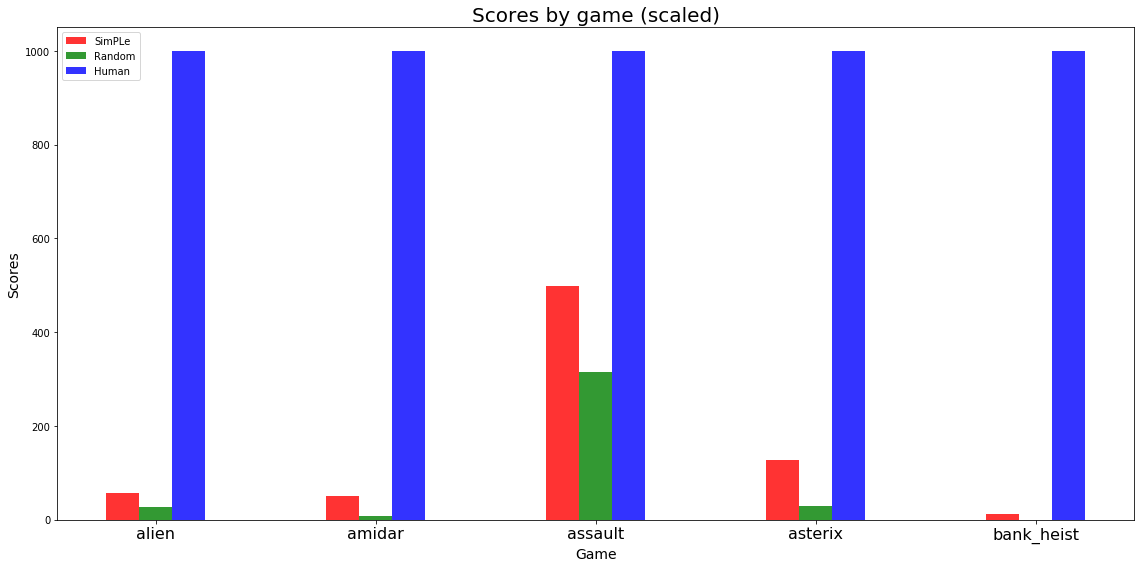

In [57]:
plot5(st_ss, st_rs, st_hs, 0)

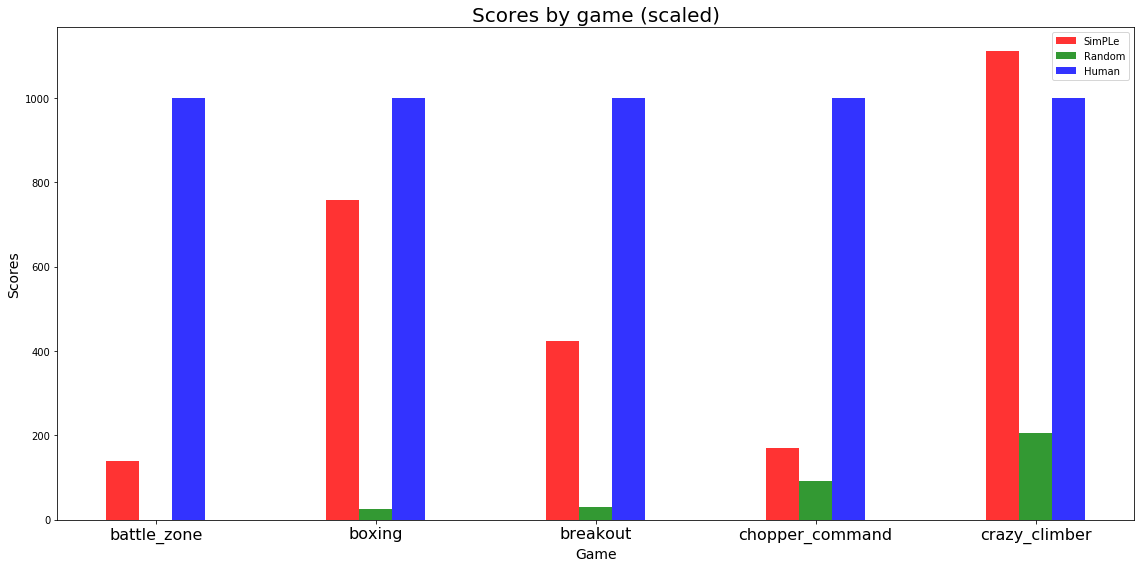

In [58]:
plot5(st_ss, st_rs, st_hs, 1)

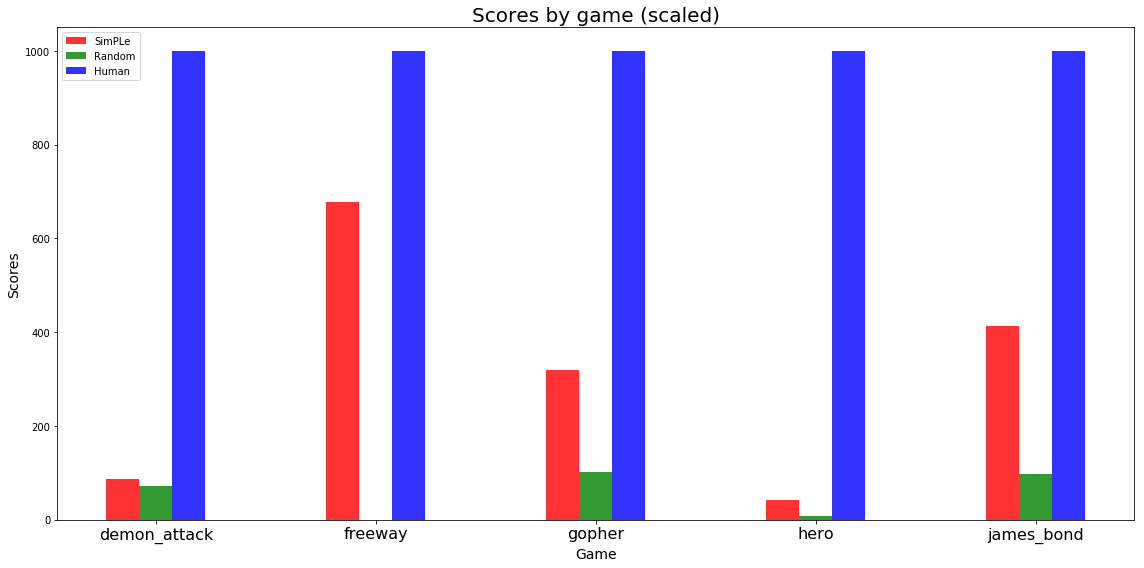

In [59]:
plot5(st_ss, st_rs, st_hs, 2)

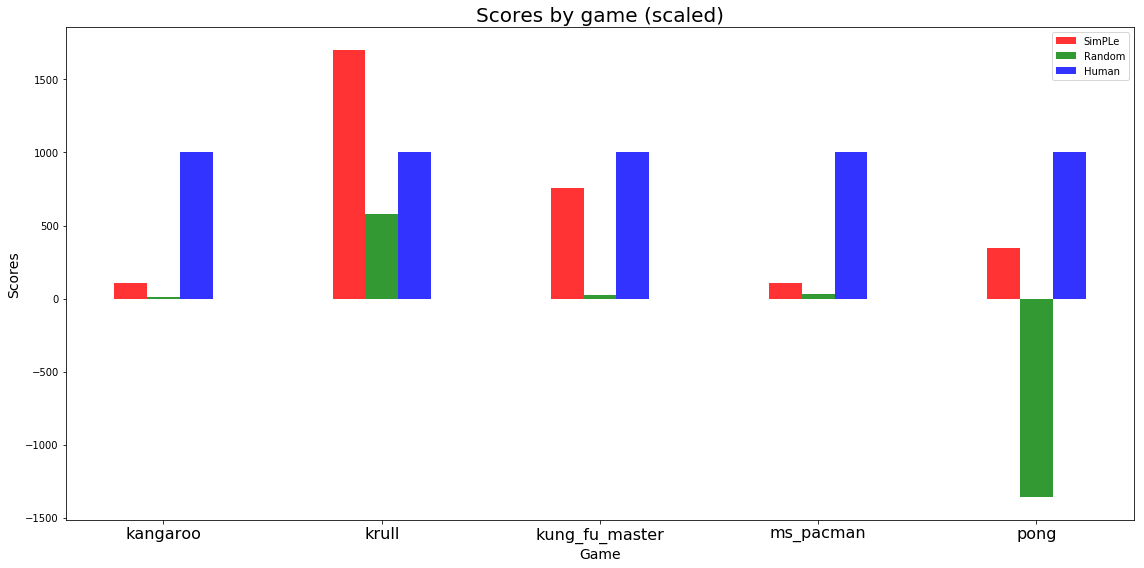

In [60]:
plot5(st_ss, st_rs, st_hs, 3)

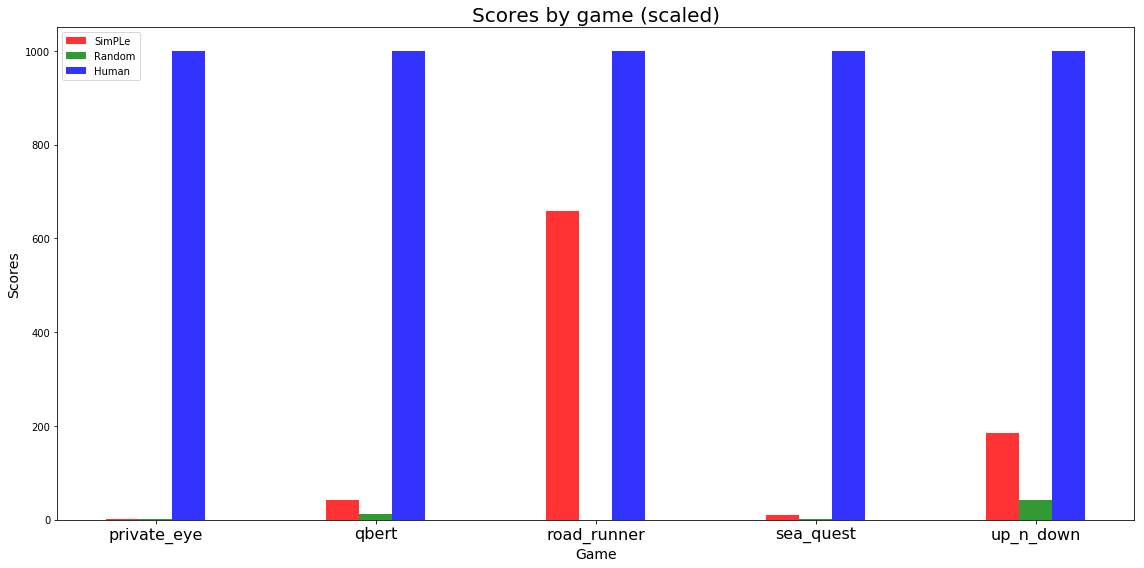

In [61]:
plot5(st_ss, st_rs, st_hs, 4)